In [24]:
import datetime
import os

from obs_data import * 
from plotFunctions import *
import mpld3
mpld3.enable_notebook()

import seaborn as sns
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.set(style="whitegrid")

# Plot graphs within this document
# %matplotlib inline
%matplotlib notebook
# For non notebook: https://stackoverflow.com/questions/9651092/my-matplotlib-pyplot-legend-is-being-cut-off

print(os.getcwd())

PC = True

D:\Documents\these_pablo\Models\BEACH2016\Analysis


### Model version to inspect

Implements:
- 1st version evaluates v1 crop table and high initial moisture (z0 = z1 = z2 = 0.4), with PERCOL = True
- 2nd version, evaluates v1 crop tabl, dry initial conditions, with PERCOL = False  (better model)

v1 Initial params & Crop Table:
- Increase Ksat(z0 = z1 = z2 = 43 mm/d); Group B (Group for CN unchanged)
- c1 ,0.25
- c2 ,0.25
- drain_coef ,0.8063
- s1 ,1
- s2 ,0.5


Graph Objectives 1:
- Baseflow component (blue, i,o,net) -> LF
- Percolation z2 (red)
- Qsim (green, i,o,net)
- Qobs (black).

Graph Objectives 2 (cumulative):
- Tot ETP (brown)
- Tot RO
- Tot Perc z2
- Tot LF: i,o,net
- Tot Qsim (green, i,o,net)
- Tot Qobs (black).

In [25]:
version = "v6"

In [26]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(path, sim_path)

('Data/qmBlk_R.csv', 'v6\\')


### Nash comparisons

In [27]:
start = 1
n_tests = 2
for i in range(start, n_tests+1):
    folder = str(i)
    col = 'Nash.c' + str(i)
    nash = pd.read_table(sim_path + folder + back + "res_nash_q_m3.tss", skiprows=4, delim_whitespace=True,
                         names=['Jdays', col],
                         header=None)
    if i == 1:
        nash_all = nash
    else:
        nash_all = nash_all.merge(nash, left_on='Jdays', right_on='Jdays', how='outer')

data = nash_all[200:]

In [28]:
data.tail()

Jdays   Nash.c1   Nash.c2
275    276  0.041266  0.100517
276    277  0.041669  0.101166
277    278  0.042151  0.101875
278    279  0.042891  0.102780
279    280  0.043958  0.103929

### Nash models 

<IPython.core.display.Javascript object>


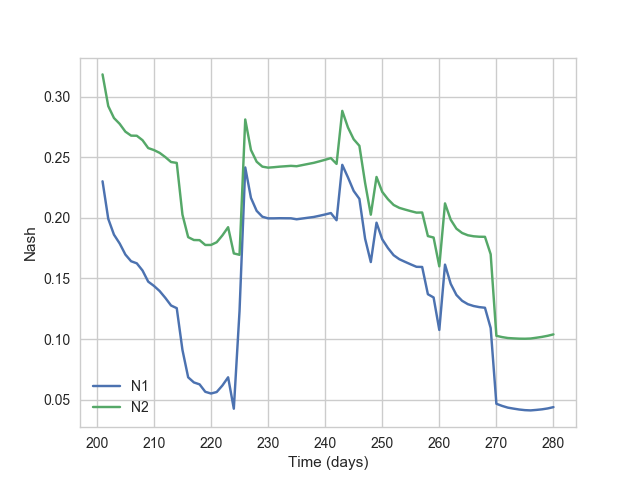

In [29]:
start = 1
n_mods = n_tests + 1

fig, ax1 = plt.subplots()
time = data.iloc[:, 0]
legend = []

for i in range(start, n_mods):
    l = "N" + str(i)
    legend.append(l)
for i in range(1, n_mods):
    ax1.plot(time, data.iloc[:, i], label=legend[i-start])
ylabel = 'Nash'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='upper right', bbox_to_anchor=(1., 1), ncol=4, shadow=True, fancybox=True)
plt.legend(loc=4, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

## Plotting discharge 


**Observations = "obs"**

**Simulation = "Scenario 4, simQ"**

Base model:
- c1 = 0.25
- drain_coef = 0.8
- z0 = 10 mm

Best combinations:
- Sc.4: c1 -= 0.15
- Sc.2: drain_coef += 0.15
- Sc.8: z0 x= 1.15
- Sc.10: s1 += 0.15

**Decreases** in lateral flow and **increases** in percolation potential improve nash coefficients. 

In [30]:
obs.head()

DayMoYr        Date  Jdays  VolTot.L  ConSmOut_ugL.blk  ConSmOut_ugL.sd  \
0 2015-10-01  01/10/2015      1       NaN               NaN              NaN   
1 2015-10-02  02/10/2015      2       NaN               NaN              NaN   
2 2015-10-03  03/10/2015      3       NaN               NaN              NaN   
3 2015-10-04  04/10/2015      4       NaN               NaN              NaN   
4 2015-10-05  05/10/2015      5       NaN               NaN              NaN   

   ConOxOut_ugL.blk  ConOxOut_ugL.sd  ConEsOut_ugL.blk  ConEsOut_ugL.sd  \
0               NaN              NaN               NaN              NaN   
1               NaN              NaN               NaN              NaN   
2               NaN              NaN               NaN              NaN   
3               NaN              NaN               NaN              NaN   
4               NaN              NaN               NaN              NaN   

   deltaOut.blk  deltaOut.sd SubWeeks  
0           NaN          NaN      NaN  
1           NaN          NaN      NaN  
2           NaN          NaN      NaN  
3           NaN          NaN      NaN  
4           NaN          NaN      NaN

In [31]:
# Edit observations (select relevant columns)
obs['DayMoYr'] = pd.to_datetime(obs['DayMoYr'])  # Convert to Date object
obs = obs[['DayMoYr', 'Jdays', 'VolTot.L']]  # keep desired columns
obs['Q_obs.m3'] = obs['VolTot.L'] * 1 / 10 ** 3

# def liters_to_m3(row):
#     val = row['VolTot.L'] * 1 / 10 ** 3
#     return val

# obs['Q_obs.m3'] = obs.apply(liters_to_m3, axis=1)

C:\Users\pablo\AppData\Local\Continuum\Anaconda3\envs\Python27-PyCharm\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Import simulated data 

**Folder = Model run **

In [32]:
folder = "2"

# Simulated Start time
yy = 2015
mm = 10
dd = 1
dt = datetime.date(yy, mm, dd)

### Daily components

In [33]:
# Lateral FLow
iLF = pd.read_table(sim_path + folder + back + "res_i_accuLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

oLF = pd.read_table(sim_path + folder + back + "res_o_accuLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'oLF.m3'],
                         header=None)

nLF = pd.read_table(sim_path + folder + back + "res_n_accuLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'nLF.m3'],
                         header=None)

# Runoff
ro = pd.read_table(sim_path + folder + back + "res_accuRunoff_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'RO.m3'],
                         header=None)
# Deep percolation
dp = pd.read_table(sim_path + folder + back + "res_accuPercol_z2_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'DP.m3'],
                         header=None)
#ETP
etp = pd.read_table(sim_path + folder + back + "res_accuEtp_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'ETP.m3'],
                         header=None)

iq_sim = pd.read_table(sim_path + folder + back + "res_i_accuVol_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iQ.m3'],
                         header=None) 

nq_sim = pd.read_table(sim_path + folder + back +  "res_n_accuVol_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iQ.m3'],
                         header=None) 

components = [iLF, oLF, nLF, ro, dp, etp, iq_sim, nq_sim, obs]


In [34]:
components[-1].head()

DayMoYr  Jdays  VolTot.L  Q_obs.m3
0 2015-10-01      1       NaN       NaN
1 2015-10-02      2       NaN       NaN
2 2015-10-03      3       NaN       NaN
3 2015-10-04      4       NaN       NaN
4 2015-10-05      5       NaN       NaN

In [35]:
window = []
for i in components:
    c = i[160:280]
    window.append(c)
# nLF = nLF[160:300]
# nLF.head()

<IPython.core.display.Javascript object>


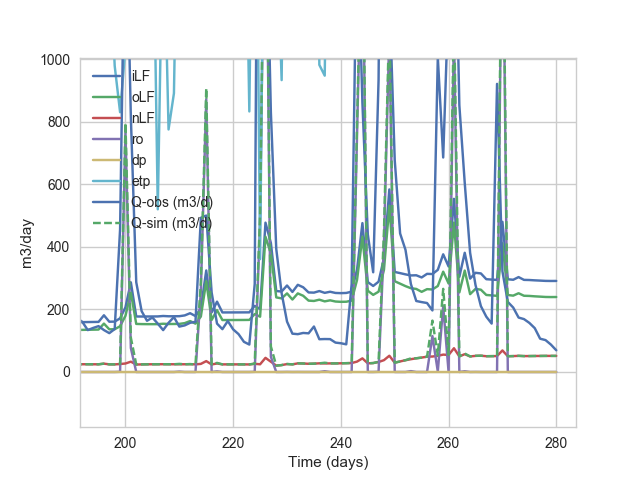

In [36]:
# components = [iLF, oLF, nLF, ro, dp, etp, iq_sim, nq_sim, obs]
fig, ax1 = plt.subplots()
time = window[0].iloc[:, 0]
iLF = window[0].iloc[:, 1]
oLF = window[1].iloc[:, 1]
nLF = window[2].iloc[:, 1]
ro = window[3].iloc[:, 1]
dp = window[4].iloc[:, 1]
etp = window[5].iloc[:, 1]

sim_vol = window[7].iloc[:, 1]
obs_vol = window[8].iloc[:, 3]


legend = ["iLF", "oLF", "nLF", "ro", "dp", "etp", "Qin", "Q-sim (m3/d)", "Q-obs (m3/d)"]

ax1.plot(time, iLF, label=legend[0])
ax1.plot(time, oLF, label=legend[1])
ax1.plot(time, nLF, label=legend[2])
ax1.plot(time, ro, label=legend[3])
ax1.plot(time, dp, label=legend[4])
ax1.plot(time, etp, label=legend[5])

ax1.plot(time, obs_vol, label=legend[-1])
ax1.plot(time, sim_vol, linestyle='dashed', label=legend[7])

# ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.legend(loc=1, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

1. Problem appears to be that the basin is not filling up quickly enough (lateral flow discharge - red).

We could treat this by:
- Decreasing ETP
- Moving run-off to recharge (Paul's Ksat)
- Keeping dDP = 0 (avoids calibration of z2's drainage coefficient.

2. 

In [56]:
import math as m
d1 = 1
s1 = 1
ksat = 43 # mm/d
# tau (percolation factor):
.0866*m.exp(d1*m.log10(s1*ksat))

0.4435312542793867

In [57]:
# Paul's Ksat values top-up Tau at 1
ksat = 279  
.0866*m.exp(s1*m.log10(s1*ksat))

0.9991491020789747

In [58]:
# Model's implementation:
# day 81 = 781 mm/day
ksat = 781
min(.0866*m.exp(s1*m.log10(s1*ksat)), 1)

1

### Total water

In [59]:
# Lateral FLow
iLF_sum = pd.read_table(sim_path + folder + back + "res_i_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

oLF_sum = pd.read_table(sim_path + folder + back + "res_o_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'oLF.m3'],
                         header=None)

nLF_sum = pd.read_table(sim_path + folder + back + "res_n_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'nLF.m3'],
                         header=None)

# Runoff
ro_sum = pd.read_table(sim_path + folder + back + "res_totRunoff_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'RO.m3'],
                         header=None)
# Deep percolation
dp_sum = pd.read_table(sim_path + folder + back + "res_totPercol_z2_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'DP.m3'],
                         header=None)

etp_sum = pd.read_table(sim_path + folder + back + "res_totEtp_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'etp.m3'],
                         header=None)

# Tot Discharge
q_i_sum = iLF_sum.merge(ro_sum, left_on='dt', right_on='dt', how='outer')
q_i_sum['q_i_sum'] = q_i_sum['iLF.m3'] + q_i_sum['RO.m3']
q_i_sum = q_i_sum.drop(['iLF.m3', 'RO.m3'], axis=1)

q_n_sum = pd.read_table(sim_path + folder + back + "res_q_sim_tot_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'q_sim.m3'],
                         header=None)

tot_obs = pd.read_table(sim_path + folder + back + "res_q_obs_tot_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'q_obs.m3'],
                         header=None)

totcomp = [iLF_sum, oLF_sum, nLF_sum, ro_sum, dp_sum, etp_sum, q_i_sum, q_n_sum, tot_obs]

tot_window = []
for i in totcomp:
    c = i[160:280]
    tot_window.append(c)
    

In [60]:
tot_window[8].head()

dt  q_obs.m3
160  161       0.0
161  162       0.0
162  163       0.0
163  164       0.0
164  165       0.0

<IPython.core.display.Javascript object>


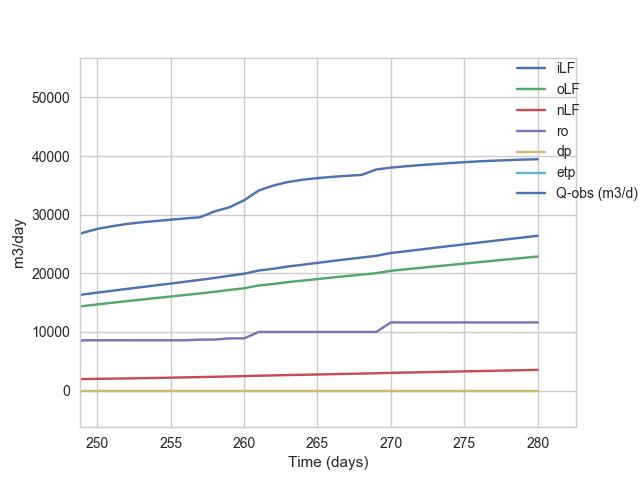

In [61]:
# components = [iLF, oLF, nLF, ro, dp, etp, iq_sim, nq_sim, obs]
fig, ax1 = plt.subplots()
time = tot_window[0].iloc[:, 0]
iLF = tot_window[0].iloc[:, 1]
oLF = tot_window[1].iloc[:, 1]
nLF = tot_window[2].iloc[:, 1]
ro = tot_window[3].iloc[:, 1]
dp = tot_window[4].iloc[:, 1]
etp = tot_window[5].iloc[:, 1]

sim_in_vol = tot_window[6].iloc[:, 1]
sim_vol = tot_window[7].iloc[:, 1]
obs_vol = tot_window[8].iloc[:, 1]


legend = ["iLF", "oLF", "nLF", "ro", "dp", "etp", "Qin", "Q-sim (m3/d)", "Q-obs (m3/d)"]

ax1.plot(time, iLF, label=legend[0])
ax1.plot(time, oLF, label=legend[1])
ax1.plot(time, nLF, label=legend[2])
ax1.plot(time, ro, label=legend[3])
ax1.plot(time, dp, label=legend[4])
ax1.plot(time, etp, label=legend[5])
ax1.plot(time, obs_vol, label=legend[-1])
# ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.show()